In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
data=pd.read_csv("global_electricity_production_data.csv")
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
data

,country_name,date,parameter,product,value,unit
0,Australia,12/1/2023,Net Electricity Production,Electricity,22646.1901,GWh
1,Australia,12/1/2023,Net Electricity Production,Total Combustible Fuels,13397.9356,GWh
2,Australia,12/1/2023,Net Electricity Production,"Coal, Peat and Manufactured Gases",9768.5223,GWh
3,Australia,12/1/2023,Net Electricity Production,Oil and Petroleum Products,289.5415,GWh
4,Australia,12/1/2023,Net Electricity Production,Natural Gas,3091.9272,GWh
...,...,...,...,...,...,...
121055,United States,1/1/2010,Total Imports,Electricity,5808.5770,GWh
121056,United States,1/1/2010,Total Exports,Electricity,996.5670,GWh
121057,United States,1/1/2010,Used for pumped storage,Electricity,2283.3220,GWh
121058,United States,1/1/2010,Distribution Losses,Electricity,22933.2970,GWh


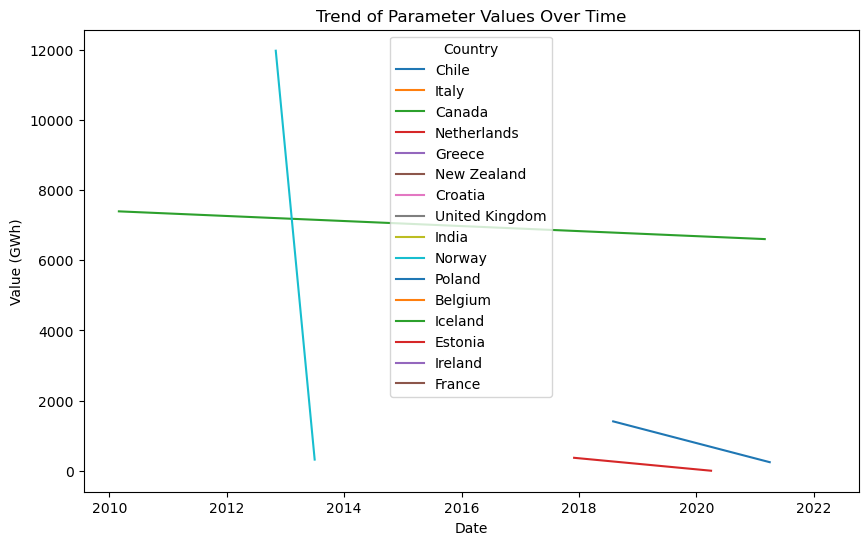

In [45]:
df = data.sample(20)

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# 1. Line plot showing the trend of parameter values over time for a specific country
plt.figure(figsize=(10, 6))
for country in df['country_name'].unique():
    df_country = df[df['country_name'] == country]
    plt.plot(df_country['date'], df_country['value'], label=country)
plt.title('Trend of Parameter Values Over Time')
plt.xlabel('Date')
plt.ylabel('Value (GWh)')
plt.legend(title='Country')
plt.show()

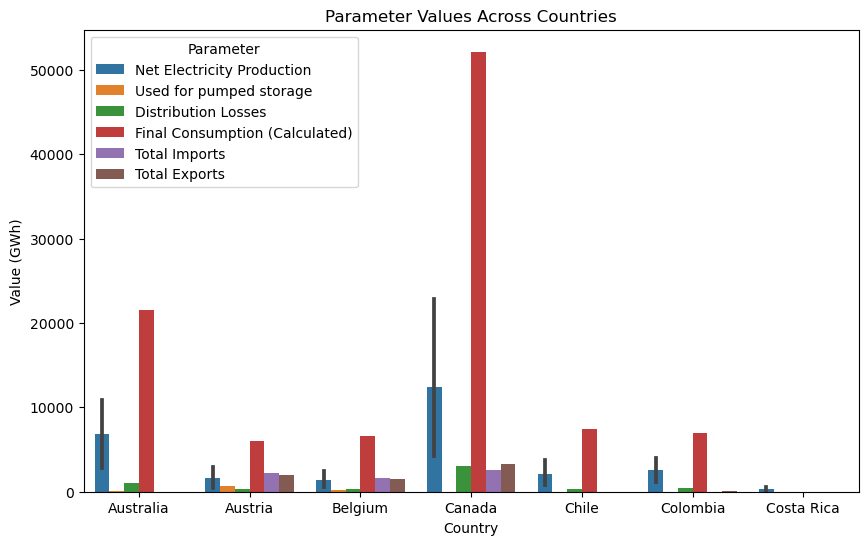

In [83]:
# 2. Bar plot comparing parameter values across different countries for a specific date
df = data.head(100)
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='country_name', y='value', hue='parameter')
plt.title('Parameter Values Across Countries')
plt.xlabel('Country')
plt.ylabel('Value (GWh)')
plt.legend(title='Parameter')
plt.show()

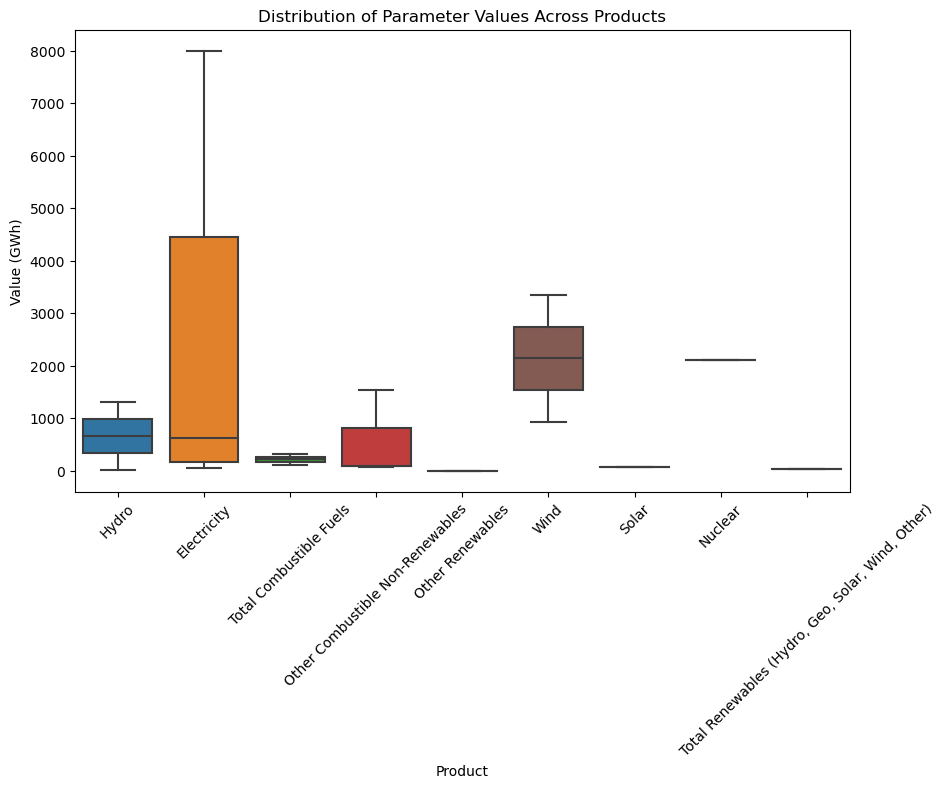

In [61]:
# 3. Box plot showing the distribution of parameter values across different products
df=data.sample(20)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='product', y='value')
plt.title('Distribution of Parameter Values Across Products')
plt.xlabel('Product')
plt.ylabel('Value (GWh)')
plt.xticks(rotation=45)
plt.show()

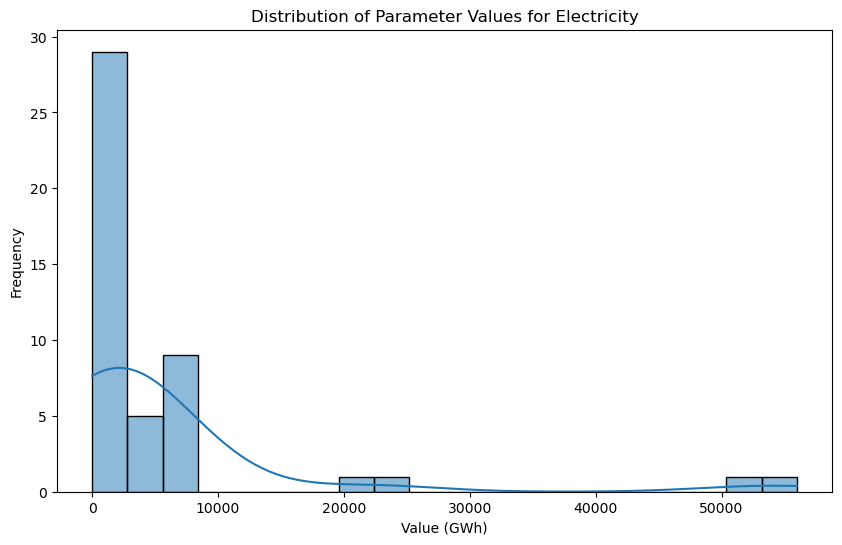

In [84]:
# 4. Histogram to visualize the distribution of parameter values for a specific product
df=data.head(150)
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['product'] == 'Electricity'], x='value', bins=20, kde=True)
plt.title('Distribution of Parameter Values for Electricity')
plt.xlabel('Value (GWh)')
plt.ylabel('Frequency')
plt.show()

In [85]:
# 5. Pie chart to show the proportion of parameter values for a specific country
df=data
fig = px.pie(df[df['country_name'] == 'Australia'], values='value', names='parameter', title='Proportion of Parameter Values for Australia')
fig.show()


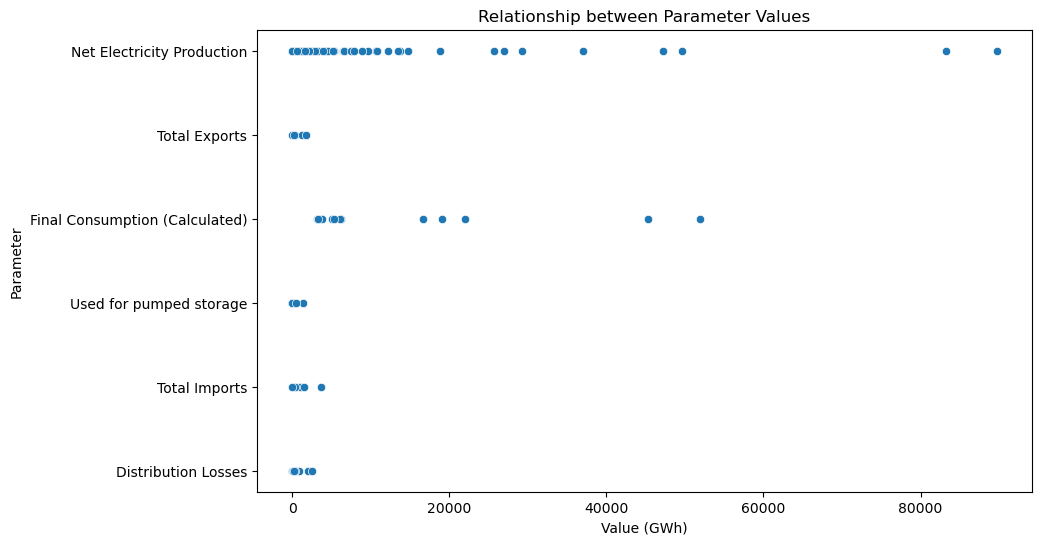

In [78]:
# 6. Scatter plot to explore the relationship between two parameters
df=data.sample(200)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='value', y='parameter')
plt.title('Relationship between Parameter Values')
plt.xlabel('Value (GWh)')
plt.ylabel('Parameter')
plt.show()


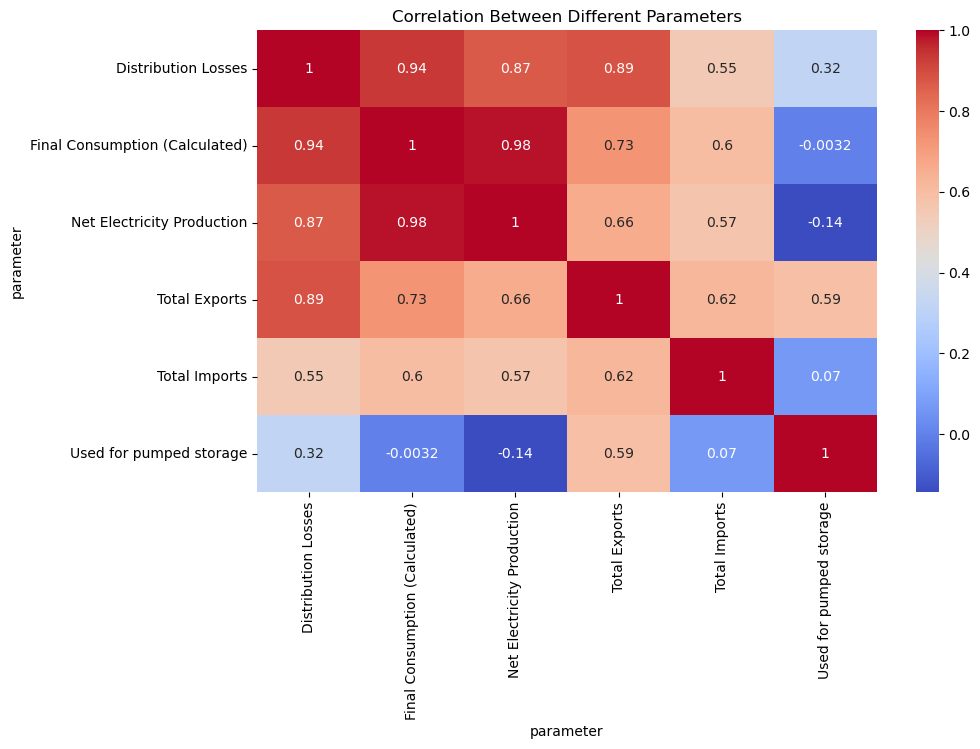

In [86]:
# 7. Heatmap to visualize the correlation between different parameters
df=data.head(200)
pivot_df = df.pivot_table(index='country_name', columns='parameter', values='value', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Different Parameters')
plt.show()